In [3]:
import numpy as np
from __future__ import division
from scipy.interpolate import UnivariateSpline


max_speeds = np.load('/home/ahmed/Desktop/pythonex/max-speeds.npy')
years_nb = max_speeds.shape[0]
data_sorted = np.sort(max_speeds)
p = 1. * np.arange(len(max_speeds)) / (len(max_speeds) + 1)

quantile = UnivariateSpline(p,data_sorted)
quantile(0.8)

array(29.45334989)

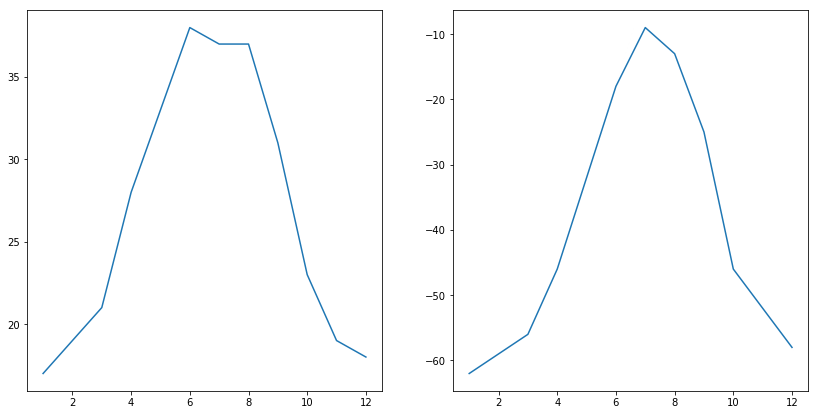

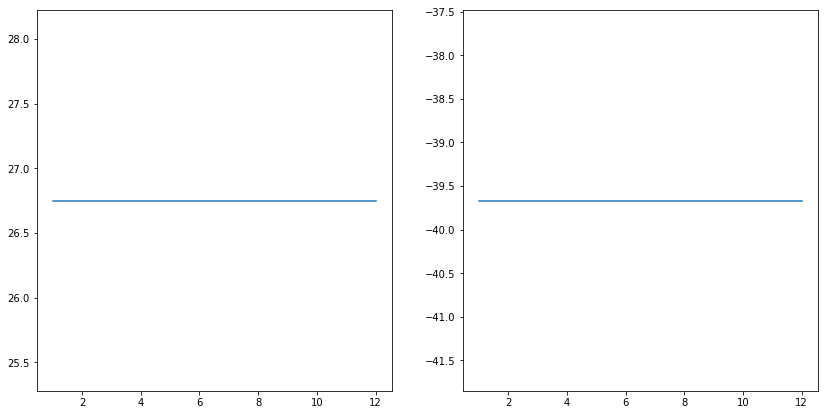

In [22]:
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize
from __future__ import division 
import math
fig,(ax11,ax22)=plt.subplots(nrows=1,ncols=2,figsize=(14,7))
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(14,7))

tmax=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
tmin=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
t=np.arange(1,13)
ax22.plot(t,tmin)
ax11.plot(t,tmax)
def f(x,A,mu,sigma,b):
    return ((A*np.exp(-(x-mu)**2)/(2*sigma**2))+b)
params, params_covariance = optimize.curve_fit(f, t,tmin)
paramsx, params_covariancex = optimize.curve_fit(f, t,tmax)
ax2.plot(t,f(t,params[0],params[1],params[2],params[3]))
ax1.plot(t,f(t,paramsx[0],paramsx[1],paramsx[2],paramsx[3]))


[ 0.          5.61144614 11.22289228 16.83433841 22.44578455 28.05723069
 33.66867683 39.28012296 44.8915691  50.50301524 56.11446138 61.72590751]


     fun: -1.4872256049436485
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: -0.7745966716565907

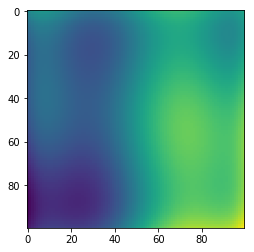

In [4]:
from scipy.optimize import root, fsolve

def f(x,y):
    return ((4-2*x**2+(x**4)/3)*x +x*y+(4*y**2-4)*(y**2))
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
xv, yv = np.meshgrid(x, y, sparse=False, indexing='xy')
d = f(xv,yv)
plt.imshow(d)
optimize.minimize_scalar(f, args=(-1,),method='bounded', bounds=[-2, 2])



the period of the hares population in years =  7.0
the period of the lynx population in years =  5.25


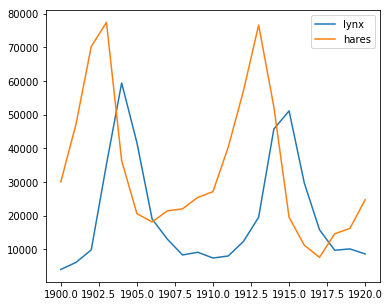

In [33]:
data = np.loadtxt('/home/ahmed/Desktop/populations.txt',skiprows=0)
from scipy import fftpack as ft 

KK=np.hsplit(data, 4)
plt.figure(figsize=(6, 5))
plt.plot(KK[0],KK[2],label='lynx')
plt.plot(KK[0],KK[1],label='hares')
plt.legend(loc='best')
sig_fft = fftpack.fft(KK[1])
power = np.abs(sig_fft)
freq=fftpack.fftfreq(len(KK[1]))
pos_mask = np.where(freq > 0)
freqs = freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
print "the period of the hares population in years = ", 1/peak_freq
sig_fft = fftpack.fft(KK[2])
power = np.abs(sig_fft)
freq=fftpack.fftfreq(len(KK[2]))
pos_mask = np.where(freq > 0)
freqs = freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
print "the period of the lynx population in years = ", 1/peak_freq


/home/ahmed/anaconda2/lib/python2.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


[[126598.45      +0.j         -4608.5796 -1892.4688j
    -322.093    -20.27744j   ...   -906.1585 +1539.3081j
    -322.093    +20.27744j    -4608.5796 +1892.4688j   ]
 [ -9421.1    +5242.1133j      5224.016  -3171.7434j
    1607.9927 +1269.4243j    ...   -677.34503 -936.16174j
     354.6247 -1003.8348j      1965.366  -2188.0593j   ]
 [ -2928.3513 +7280.916j      -1116.4065 +1338.3179j
    -474.20056 +385.40216j   ...    239.7723  -977.2129j
    1582.9283  -261.95346j     2641.927   -292.09366j  ]
 ...
 [  1850.5718 -2451.1787j      -781.0807   +13.744501j
     377.90707  +12.6699295j ...  -1526.7869 +1271.2621j
   -2705.5718 -3488.529j       1897.404  -2281.9092j   ]
 [ -2928.3513 -7280.916j       2641.927   +292.09366j
    1582.9283  +261.95346j   ...  -2208.4302   +81.807434j
    -474.20056 -385.40216j    -1116.4065 -1338.3179j   ]
 [ -9421.1    -5242.1133j      1965.366  +2188.0593j
     354.6247 +1003.8348j    ...   1190.5856 -1431.9937j
    1607.9927 -1269.4243j      5224.016  +31

/home/ahmed/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


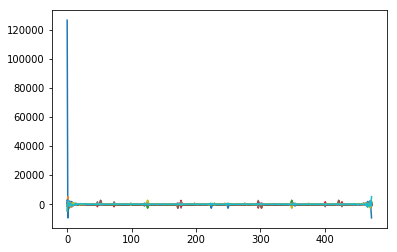

In [27]:
k=plt.imread('/home/ahmed/Desktop/moonlanding.png')
s=ft.fft2(k)
print s
plt.plot(s)


In [32]:
max_f=np.abs(s).max()
filt_im = s.copy()
filt_im[np.abs(filt_im)>0.01*max_f]=0
print filt_im 


[[   0.        +0.j           0.        +0.j
  -322.093    -20.27744j   ...    0.        +0.j
  -322.093    +20.27744j      0.        +0.j       ]
 [   0.        +0.j           0.        +0.j
     0.        +0.j        ... -677.34503 -936.16174j
   354.6247 -1003.8348j       0.        +0.j       ]
 [   0.        +0.j           0.        +0.j
  -474.20056 +385.40216j   ...  239.7723  -977.2129j
     0.        +0.j           0.        +0.j       ]
 ...
 [   0.        +0.j        -781.0807   +13.744501j
   377.90707  +12.6699295j ...    0.        +0.j
     0.        +0.j           0.        +0.j       ]
 [   0.        +0.j           0.        +0.j
     0.        +0.j        ...    0.        +0.j
  -474.20056 -385.40216j      0.        +0.j       ]
 [   0.        +0.j           0.        +0.j
   354.6247 +1003.8348j    ...    0.        +0.j
     0.        +0.j           0.        +0.j       ]]
